In [1]:
# This notebook uses Python 3

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
PATH_BASE = os.getcwd()
#print("PATH_BASE = ", PATH_BASE)

os.chdir( "../../figs")
PATH_FIGS = os.getcwd()
#print("PATH_FIGS = ", PATH_FIGS )

os.chdir( PATH_BASE )
os.chdir( "../libs")
PATH_LIBS = os.getcwd()
#print("PATH_LIBS = ", PATH_LIBS )

# re-set path back to base
os.chdir( PATH_BASE )
#print("Currently in: ", os.getcwd() )


In [3]:
# Libraries created by MZ
os.chdir( PATH_LIBS )

import plotting as pg
import costgrad_vec as cg
import common as nc
import algos_vec as ao
import params as pm

os.chdir( PATH_BASE )


# ==================== EXPERIMENT ======================

In [4]:
nom = cg.get_cost_names()
print(nom)
name = nom[1]
print("name = ", name)

p_init = cg.get_p_init(name)
print("p_init = ", p_init)

p_target = cg.get_p_target(name)
print("p_target = ", p_target)

# parameters ----------------------------
num      = 200
b_print  = True
rho_targ = 0.1
#alpha    = 0.1

# Increase alpha by a factor of i_factor at i = i_manual.  To skip this, set i<0
i_manual = -1
i_factor = 1

#g_rho_type = "original"
g_rho_type = "new"

# Definition of rho --------------
print("g_rho_type = ", g_rho_type)


['x^2', 'x^4', 'ellipse', '1Dsigwell', '2Dshell', 'Beale']
name =  x^4
p_init =  [-3.]
p_target =  [0.]
g_rho_type =  new


In [5]:
# ========================== GD Family ==========================
#type_opt = "dp_GD_basic"
#type_opt = "dp_GD_momentum"
#type_opt = "dp_GD_Nesterov"
#type_opt = "dp_RMSProp"
type_opt = "dp_Adam"

#alpha, num1 = pm.get_alpha_num( name, type_opt )
#print("new values: alpha,num1 = ", alpha, num1)
alpha = 0.15

d_res_GD = ao.do_GDFamily(name, alpha, num, p_init.copy(), p_target, type_opt, rho_targ, b_print, i_manual, i_factor, g_rho_type)


cost_old =  81.0
1: cost,rho,dotp = 53.22595339258505, 0.07570435900585187, 1.0
2: cost,rho,dotp = 42.539719456735156, 0.07880123203663612, 1.0
3: cost,rho,dotp = 33.69239740210085, 0.0817766197197074, 1.0
4: cost,rho,dotp = 26.456570824310223, 0.08458776831052674, 1.0
5: cost,rho,dotp = 20.60872443100126, 0.0871971027304656, 1.0
6: cost,rho,dotp = 15.936043892608359, 0.08957429580830477, 1.0
7: cost,rho,dotp = 12.241963686237074, 0.09169743188386476, 1.0
8: cost,rho,dotp = 9.350051072021891, 0.09355318102587115, 1.0
9: cost,rho,dotp = 7.106099541585577, 0.09513610609746927, 1.0
10: cost,rho,dotp = 5.378567391729559, 0.09644736461520748, 1.0
11: cost,rho,dotp = 4.05767983495173, 0.09749311394469906, 1.0
12: cost,rho,dotp = 3.053596081301085, 0.09828289438569476, 1.0
13: cost,rho,dotp = 2.294038328740906, 0.09882818492516679, 1.0
14: cost,rho,dotp = 1.721717393215987, 0.09914123702945703, 1.0
15: cost,rho,dotp = 1.291801935608056, 0.09923421721040475, 1.0
16: cost,rho,dotp = 0.969589766

max index =  200
final arclength (sumd_x) =  2.8631705695564433573
final distance (sumd_y) =  2.863170569556443356


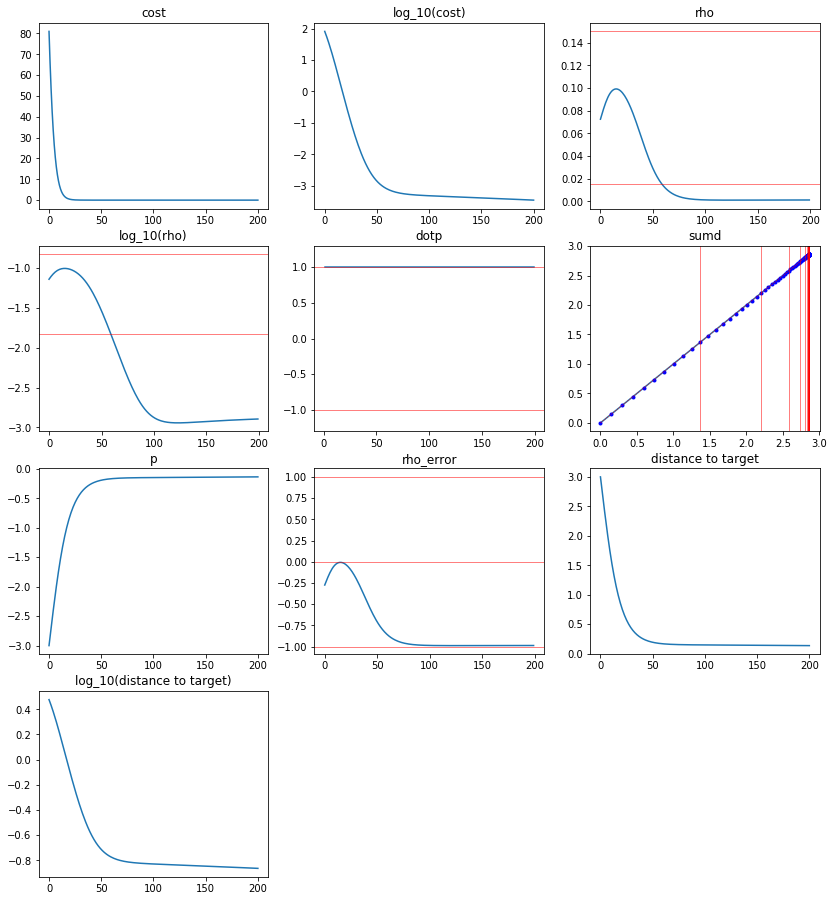

In [6]:
sumd_line_freq = 10
pg.do_Plots_final(d_res_GD, pm.g_rhomin, pm.g_rhomax, sumd_line_freq)
pg.do_plot_special(name, d_res_GD)
#filename = None
#pg.do_plot_2Dshell_special(name, d_res_GD, "2Dshell", filename, pm.g_ymin_2Dshell, pm.g_ymax_2Dshell)


In [7]:
# ========================== Neo Family ==========================
#type_opt = "dp_GD_basic"
type_opt = "dp_GD_momentum"
#type_opt = "dp_GD_Nesterov"
#type_opt = "dp_RMSProp"
#type_opt = "dp_Adam"

#alpha = pm.g_alpha_Neo_init
alpha = 0.002
print("alpha = ", alpha )

d_res_Neo = ao.do_Neograd(name, alpha, num, p_init.copy(), p_target, type_opt, rho_targ, b_print, g_rho_type)
#d_res_Neo = ao.do_Neograd_dbl(name, alpha, num, p_init.copy(), p_target, type_opt, rho_targ, b_print, g_rho_type)


alpha =  0.002
0  ============================================
alpha,rho =  0.0019434587221805544794 0.102909311999999998265  ---------------
1  ============================================
alpha,rho =  0.0019599996051673966437 0.096666801341760317916  ---------------
1: cost,rho,dotp = 45.437416604400404, 0.09666680134176031, 1.0
2  ============================================
alpha,rho =  0.0019903271607033596426 0.09404290956321890532  ---------------
2: cost,rho,dotp = 34.65080823712286, 0.09404290956321891, 1.0
3  ============================================
alpha,rho =  0.0020315553289549303162 0.092126221535533393145  ---------------
3: cost,rho,dotp = 26.583077241238044, 0.09212622153553339, 1.0
4  ============================================
alpha,rho =  0.0020817121092525400408 0.090705149814022312126  ---------------
4: cost,rho,dotp = 20.483930371832926, 0.0907051498140223, 1.0
5  ============================================
alpha,rho =  0.0021394015835003940712 0.089642389

max index =  200
final arclength (sumd_x) =  2.9999817522960105978
final distance (sumd_y) =  2.9999817522960105975


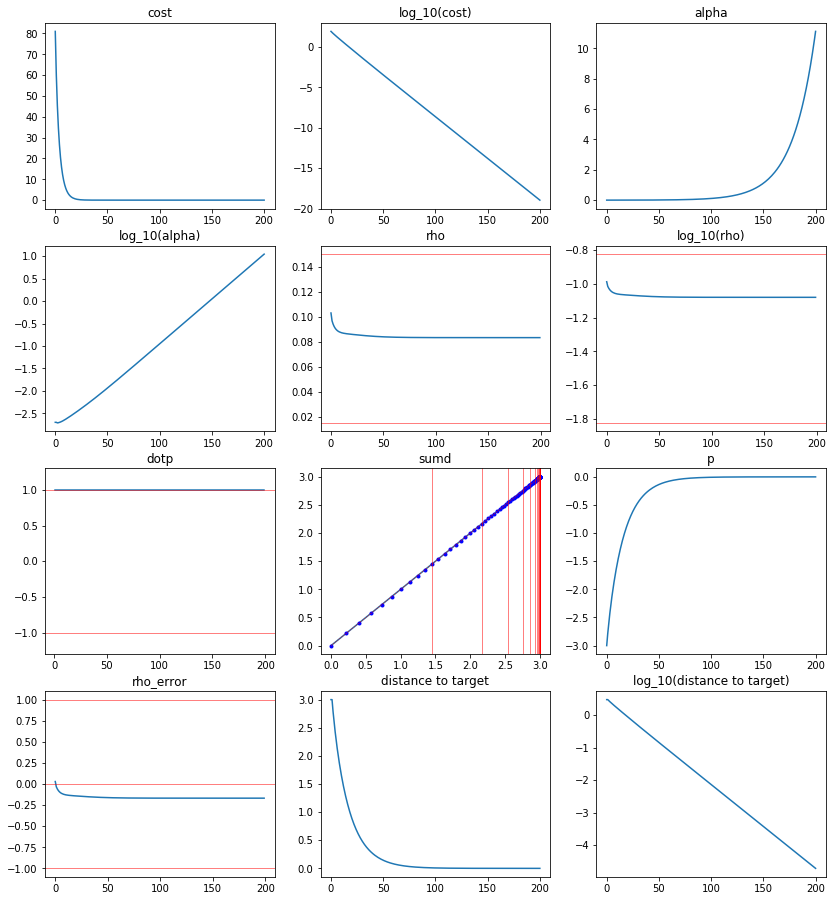

In [8]:
sumd_line_freq = 10
pg.do_Plots_final(d_res_Neo, pm.g_rhomin, pm.g_rhomax, sumd_line_freq)
pg.do_plot_special(name, d_res_Neo)
#filename = None
#pg.do_plot_2Dshell_special(name, d_res_Neo, "2Dshell", filename, pm.g_ymin_2Dshell, pm.g_ymax_2Dshell)


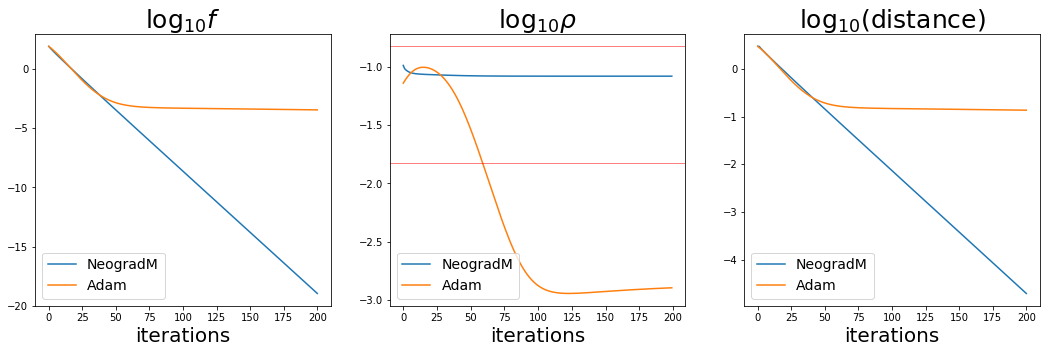

In [9]:
nrows = 1
ncols = 3
plt.figure(1, figsize=(6*ncols, 5*nrows))

size_title = 25
size_label = 20

idx = 1
# log(cost) --------------------------------
plt.subplot(nrows, ncols, idx)
plt.plot( np.log10(d_res_Neo["cost"]), label="NeogradM")
plt.plot( np.log10(d_res_GD["cost"]), label="Adam")
plt.title(r'$\log_{10}f$', fontsize= size_title)
plt.legend(loc = 'lower left', fontsize= 14)
plt.xlabel(r'iterations', fontsize= size_label)

# log(rho) --------------------------------
idx += 1
plt.subplot(nrows, ncols, idx)
plt.plot( np.log10(d_res_Neo["rho"]), label="NeogradM")
plt.plot( np.log10(d_res_GD["rho"]), label="Adam")
plt.title(r'$\log_{10} \rho$', fontsize= size_title)
plt.legend(loc = 'lower left', fontsize= 14)
#plt.legend(loc = 'center right', fontsize= 14)
plt.xlabel(r'iterations', fontsize= size_label)
plt.axhline(y=np.log10(pm.g_rhomin), color='red', linewidth=0.5)
plt.axhline(y=np.log10(pm.g_rhomax), color='red', linewidth=0.5)

# log(dist) --------------------------------
idx += 1
plt.subplot(nrows, ncols, idx)
plt.plot( np.log10(d_res_Neo["dist"]), label="NeogradM")
plt.plot( np.log10(d_res_GD["dist"]), label="Adam")
plt.title(r'$\log_{10}$(distance)', fontsize= size_title)
plt.legend(loc = 'lower left', fontsize= 14)
plt.xlabel(r'iterations', fontsize= size_label)

plt.savefig(PATH_FIGS + "/quartic-triple.png")
#plt.show()
